## Outliers

It is completely a diff data point that are significantly different from other data points which may arise suspession.
- useful in some usecases like in fraud detection few records may be different which can be used to predict frauds.

##### Can these be removed??
Depends on problem statement whether to pay attention or to completely ignore

##### Models sensitive to Outliers
1. Naivye Bayes classifier - not sensitive
2. SVM -  not sensitive
3. Linear - sensitive
4. Logistic - sensitive
5. Decision tree regressor or Classifier - not sensitive
6. Ensemble(RF,Xgboost,GB) - not sensitive
7. KNN - not sensitive
8. KMeans - sensitive
9. Hierarchial - sensitive
10. PCA - very sensitive
11. Neural networks - sensitive
12. LDA - 
13. all Unsupervised - sensitive

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\pavan\OneDrive\Desktop\prep\datasets\titanic\train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df['Age'].isnull().sum()

177

In [5]:
import seaborn as sns

C:\Users\pavan\AppData\Local\Temp\ipykernel_31092\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

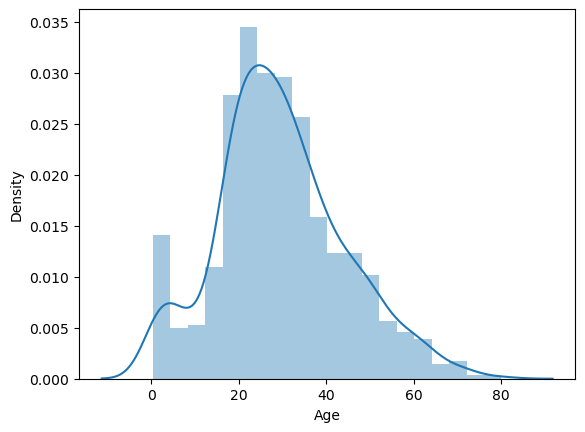

In [6]:
sns.distplot(df['Age'])

C:\Users\pavan\AppData\Local\Temp\ipykernel_31092\315930958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

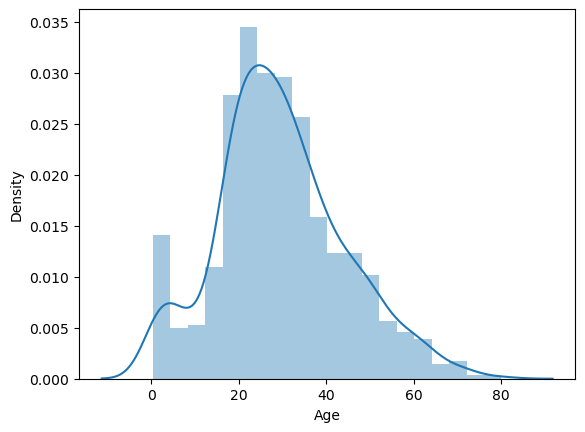

In [7]:
sns.distplot(df['Age'].dropna())

C:\Users\pavan\AppData\Local\Temp\ipykernel_31092\827162487.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(100))


<Axes: xlabel='Age', ylabel='Density'>

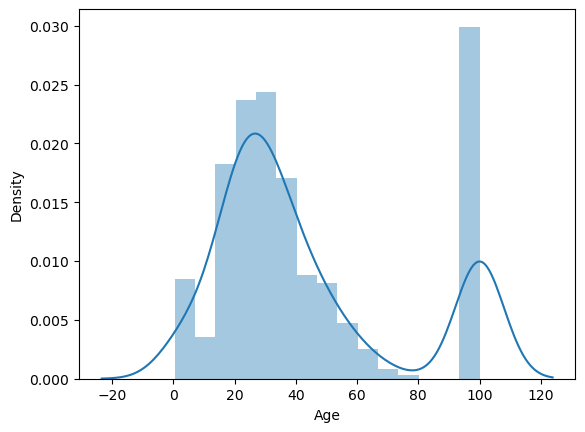

In [8]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of passengers')

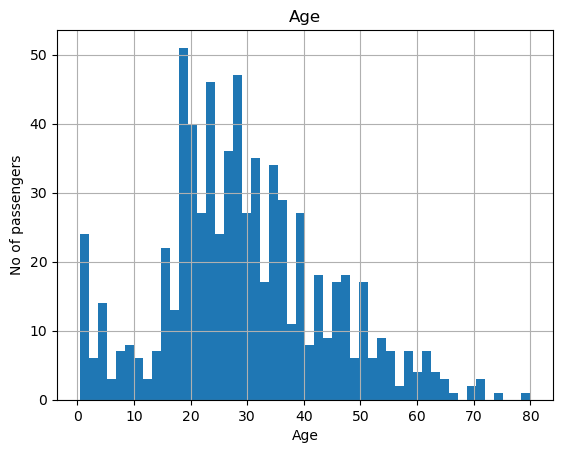

In [9]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

This is guassianly distributed

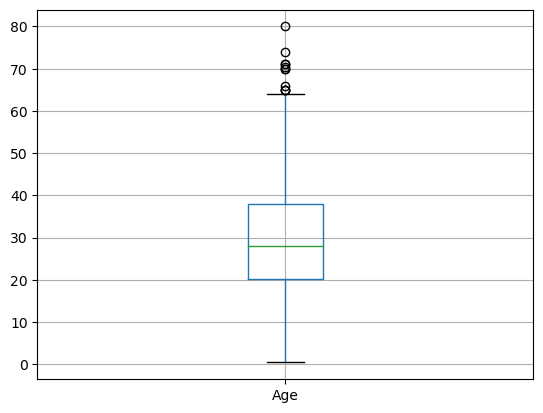

In [10]:
#If data is normally/Guassianly distributed, diff approach to find outliers

figure = df.boxplot(column='Age')

In [11]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
#assuming age follows guassion distribution, we will calculate the boundaries which differentiates the outliers

upper_boundary = df['Age'].mean() + 3 * df['Age'].std()
lower_boundary = df['Age'].mean() - 3 * df['Age'].std()

In [13]:
print(upper_boundary)
print(lower_boundary)
print(df['Age'].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


Age is guassianly distributed or normally distributed. 
In this case, any values that are not in the range of upper and lower boundary are outliers. 
Also, Age cannt be a negative value so lower boundary can be considered here as 0. 

Text(0, 0.5, 'No of passengers')

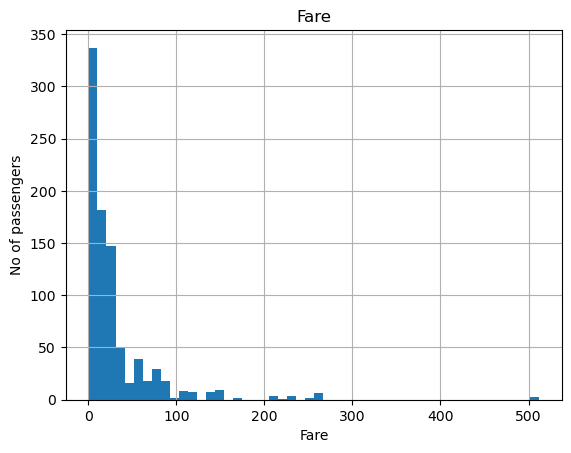

In [14]:
## Feature is skewed

figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

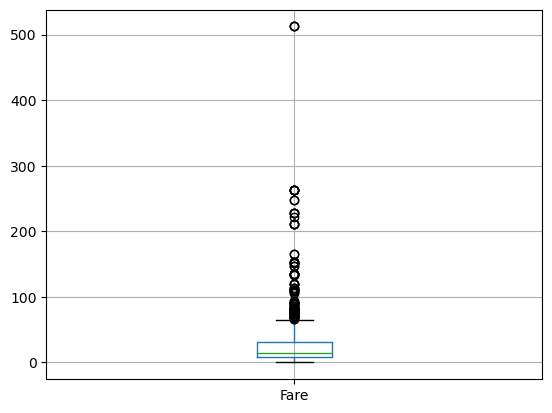

In [15]:
figure = df.boxplot(column='Fare')

In [16]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
#the below steps has to be done, incase any column is skewed.
# lets compute interquantile(diff between 75% and 25%) range to calculate the boundaries

IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [18]:
lower_bridge = df.Fare.quantile(0.25) - (IQR * 1.5)
upper_bridge = df.Fare.quantile(0.75) + (IQR * 1.5)

In [19]:
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [20]:
#extreme outliers
lower_bridge = df.Fare.quantile(0.25) - (IQR * 3)
upper_bridge = df.Fare.quantile(0.75) + (IQR * 3)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


If we have a look at the distribution of Fare histogram, we have some data which are even at 500 as well. So in this case extreme outliers need to be considered.

In [22]:
data = df.copy()

In [23]:
data.loc[data['Age']>73,'Age']=73

Text(0, 0.5, 'No of passengers')

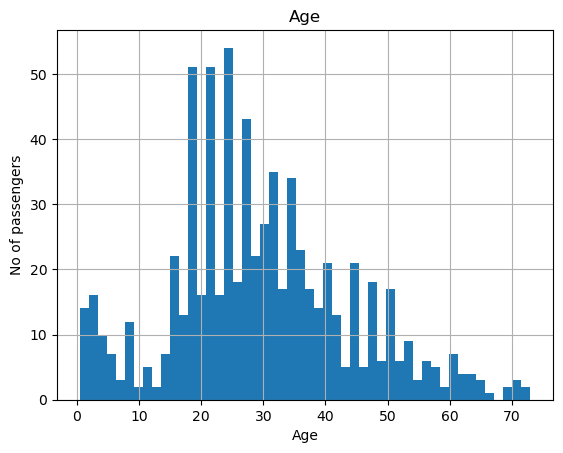

In [27]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

In [25]:
data.loc[data['Fare']>100,'Fare']=100

Text(0, 0.5, 'No of passengers')

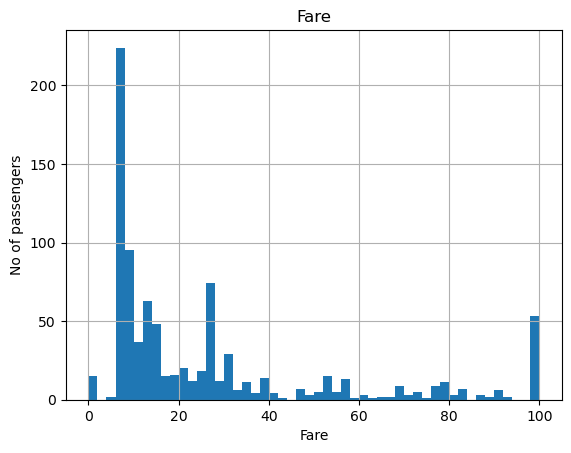

In [26]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.2,random_state=42)

In [35]:
##Logistic Regression
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

In [37]:
from sklearn.metrics import accuracy_score,roc_auc_score

print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6871508379888268
roc_auc_score: 0.7631274131274132


In [38]:
##RandomForest classifier
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

In [39]:
from sklearn.metrics import accuracy_score,roc_auc_score

print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6871508379888268
roc_auc_score: 0.6993564993564994
